# Multiple Linear Regression - Bike Sharing Case Study

## Step 1: Reading and Understanding the Data

### Step 1.1. Readng the data

In [1]:
# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# importing libraries required to read the data
import numpy as np
import pandas as pd

In [3]:
bikeSharing = pd.read_csv("day.csv")

In [4]:
# Check the head of the dataset
bikeSharing.head()

instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  01-01-2018       1   0     1        0        6           0   
1        2  02-01-2018       1   0     1        0        0           0   
2        3  03-01-2018       1   0     1        0        1           1   
3        4  04-01-2018       1   0     1        0        2           1   
4        5  05-01-2018       1   0     1        0        3           1   

   weathersit       temp     atemp      hum  windspeed  casual  registered  \
0           2  14.110847  18.18125  80.5833  10.749882     331         654   
1           2  14.902598  17.68695  69.6087  16.652113     131         670   
2           1   8.050924   9.47025  43.7273  16.636703     120        1229   
3           1   8.200000  10.60610  59.0435  10.739832     108        1454   
4           1   9.305237  11.46350  43.6957  12.522300      82        1518   

    cnt  
0   985  
1   801  
2  1349  
3  1562  
4  1600

**Inspect the various aspects of the Bike Sharing dataframe**

In [5]:
# Checking number of coulmns and rows 
bikeSharing.shape

(730, 16)

In [6]:
# Getting additional information about dataframe like no. of null values per coulmn, data type of each variable, etc.
bikeSharing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [7]:
# looking at some statistical information about numeric variables into dataframe.
bikeSharing.describe()

instant      season          yr        mnth     holiday     weekday  \
count  730.000000  730.000000  730.000000  730.000000  730.000000  730.000000   
mean   365.500000    2.498630    0.500000    6.526027    0.028767    2.997260   
std    210.877136    1.110184    0.500343    3.450215    0.167266    2.006161   
min      1.000000    1.000000    0.000000    1.000000    0.000000    0.000000   
25%    183.250000    2.000000    0.000000    4.000000    0.000000    1.000000   
50%    365.500000    3.000000    0.500000    7.000000    0.000000    3.000000   
75%    547.750000    3.000000    1.000000   10.000000    0.000000    5.000000   
max    730.000000    4.000000    1.000000   12.000000    1.000000    6.000000   

       workingday  weathersit        temp       atemp         hum   windspeed  \
count  730.000000  730.000000  730.000000  730.000000  730.000000  730.000000   
mean     0.683562    1.394521   20.319259   23.726322   62.765175   12.763620   
std      0.465405    0.544807    7.506729    8.150308   14.237589    5.195841   
min      0.000000    1.000000    2.424346    3.953480    0.000000    1.500244   
25%      0.000000    1.000000   13.811885   16.889713   52.000000    9.041650   
50%      1.000000    1.000000   20.465826   24.368225   62.625000   12.125325   
75%      1.000000    2.000000   26.880615   30.445775   72.989575   15.625589   
max      1.000000    3.000000   35.328347   42.044800   97.250000   34.000021   

            casual   registered          cnt  
count   730.000000   730.000000   730.000000  
mean    849.249315  3658.757534  4508.006849  
std     686.479875  1559.758728  1936.011647  
min       2.000000    20.000000    22.000000  
25%     316.250000  2502.250000  3169.750000  
50%     717.000000  3664.500000  4548.500000  
75%    1096.500000  4783.250000  5966.000000  
max    3410.000000  6946.000000  8714.000000

### Step 1.2: Visualising the Data and Understanding it.

In [8]:
# import libraries required for visualizations (ploting graphs)
import matplotlib.pyplot as plt
import seaborn as sns

#### Visualising Numeric Variables

Let's make a pairplot of all the numeric variables

<Figure size 1440x720 with 0 Axes>

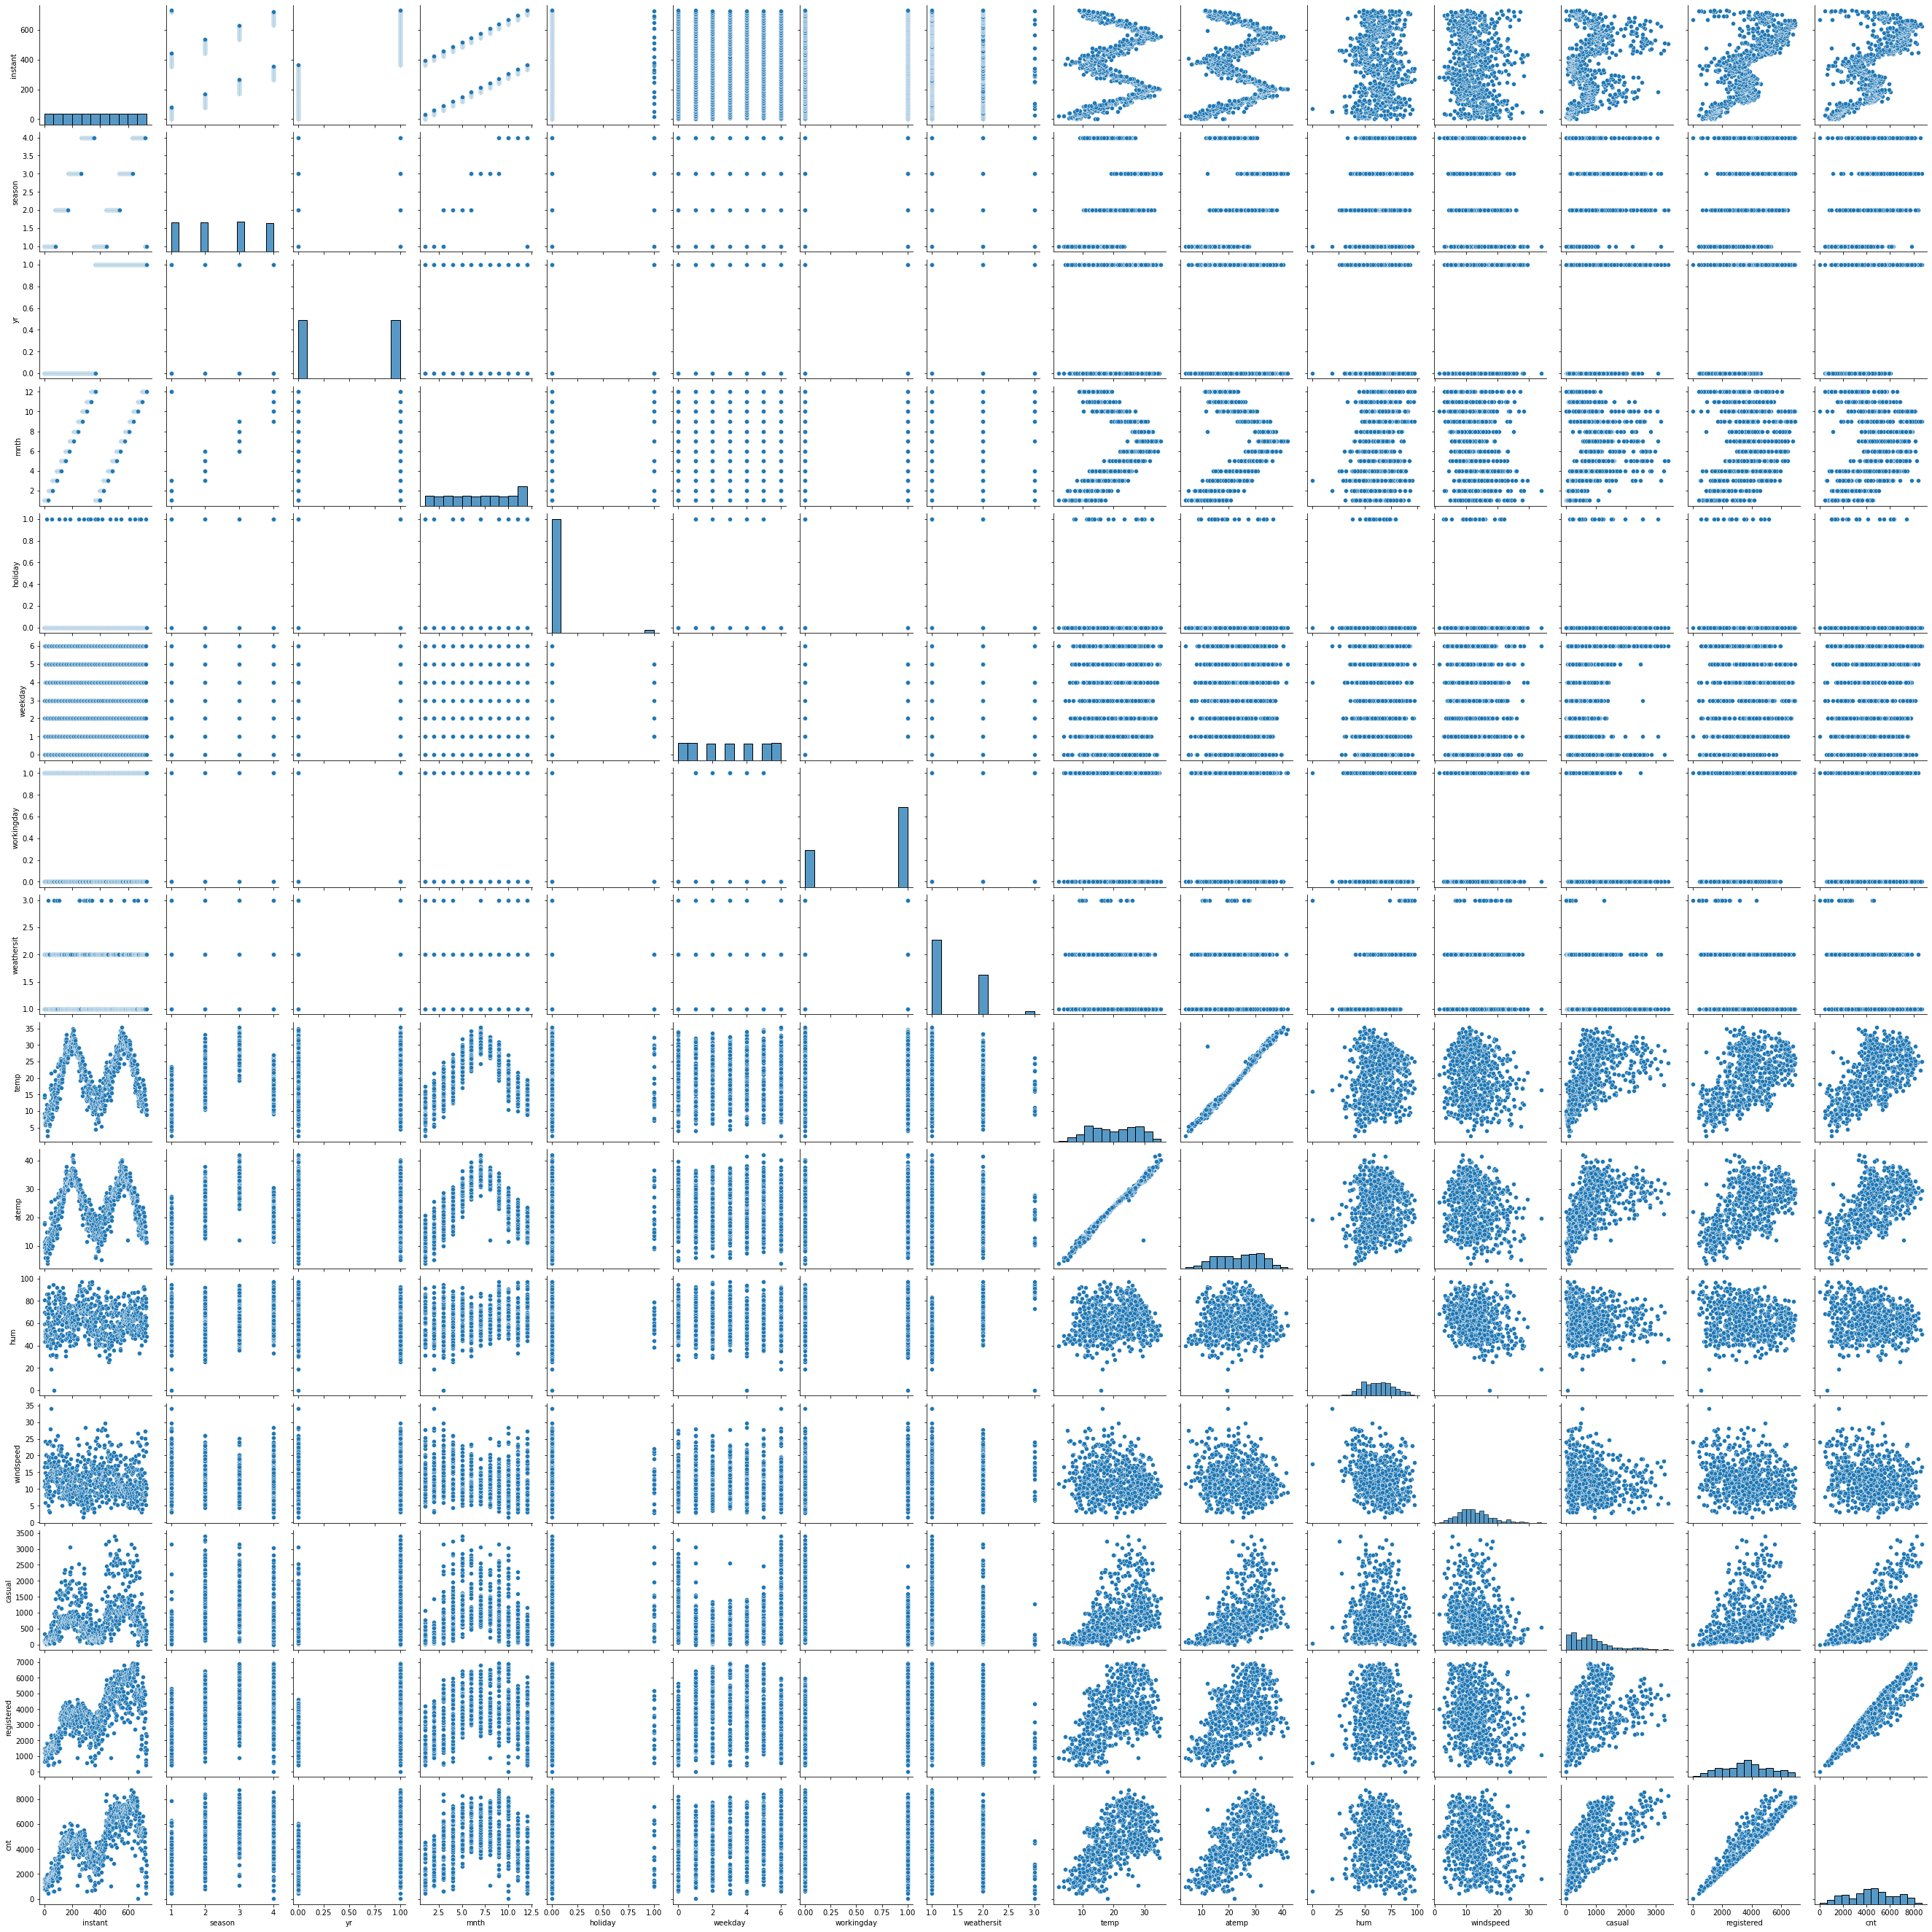

In [9]:
plt.figure(figsize = (20, 10))
sns.pairplot(bikeSharing)
plt.show()

#### Observations: -
Right now all the variables into data set looks like numeric in nature however its not (as per data dictionary), 
hence for proper understanding of data this pairplot is not enough , we need prepare and handle the variables who looks numeric but catagorical in nature as a part of data preperation step.

## Step 2: Preparing Data and EDA

### Step 2.1 EDA
convert variables who looks numeric but catogarical in nature into proper categorical Format -
1. season : season (1:spring, 2:summer, 3:fall, 4:winter)
2. weathersit : 
      1. Clear, Few clouds, Partly cloudy, Partly cloudy **(Assuming categoary name as - Clear)**
      2. Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds **(Assuming categoary name as - Mist)**
      3. Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds As **(Assuming variable name as - Light)**
      4. Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog As **( Assuming categoary name as - Heavy)**
      
        
3. weekday : day of the week **Assumptions of values(categoary) as bellow** -
        - 0: Monday     - 3: Thursday
        - 1: Tuesday    - 4: Friday
        - 2: Wednesday  - 5: Saturday    - 6: Sunday
4. mnth : month ( 1 to 12) **Assumptions of values(categoary) as bellow** :-  
        - 1: Jan    - 4: Apr   - 7: Jul   - 10: Oct
        - 2: Feb    - 5: May   - 8: Aug   - 11: Nov
        - 3: Mar    - 6: Jun   - 9: Sep   - 12: Dec

In [10]:
# Changing values of categorical variable

bikeSharing['season'] = bikeSharing['season'].map({1:'spring', 2:"summer", 3:"fall", 4:"winter"})
bikeSharing['weathersit'] = bikeSharing['weathersit'].map({1:'clear', 2:"mist", 3:"light", 4:"heavy"})
bikeSharing['weekday'] = bikeSharing['weekday'].map({0:'Monday', 1:'Tuesday', 2:"Wednesday", 3:"Thursday", 4:"Friday", 5:"Saturday", 6:"Sunday"})
bikeSharing['mnth'] = bikeSharing['mnth'].map({1:'Jan', 2:"Feb", 3:"Mar", 4:"Apr", 5:"May", 6:"Jun", 7:'Jul', 8:"Aug", 9:"Sep", 10:"Oct", 11:"Nov", 12:"Dec"})

In [11]:
# lets look at how the categories are created
bikeSharing[['season','weathersit','weekday','mnth']]

season weathersit    weekday mnth
0    spring       mist     Sunday  Jan
1    spring       mist     Monday  Jan
2    spring      clear    Tuesday  Jan
3    spring      clear  Wednesday  Jan
4    spring      clear   Thursday  Jan
..      ...        ...        ...  ...
725  spring       mist     Friday  Dec
726  spring       mist   Saturday  Dec
727  spring       mist     Sunday  Dec
728  spring      clear     Monday  Dec
729  spring       mist    Tuesday  Dec

[730 rows x 4 columns]

#### Visualizing Numeric Variables after EDA

<Figure size 1440x720 with 0 Axes>

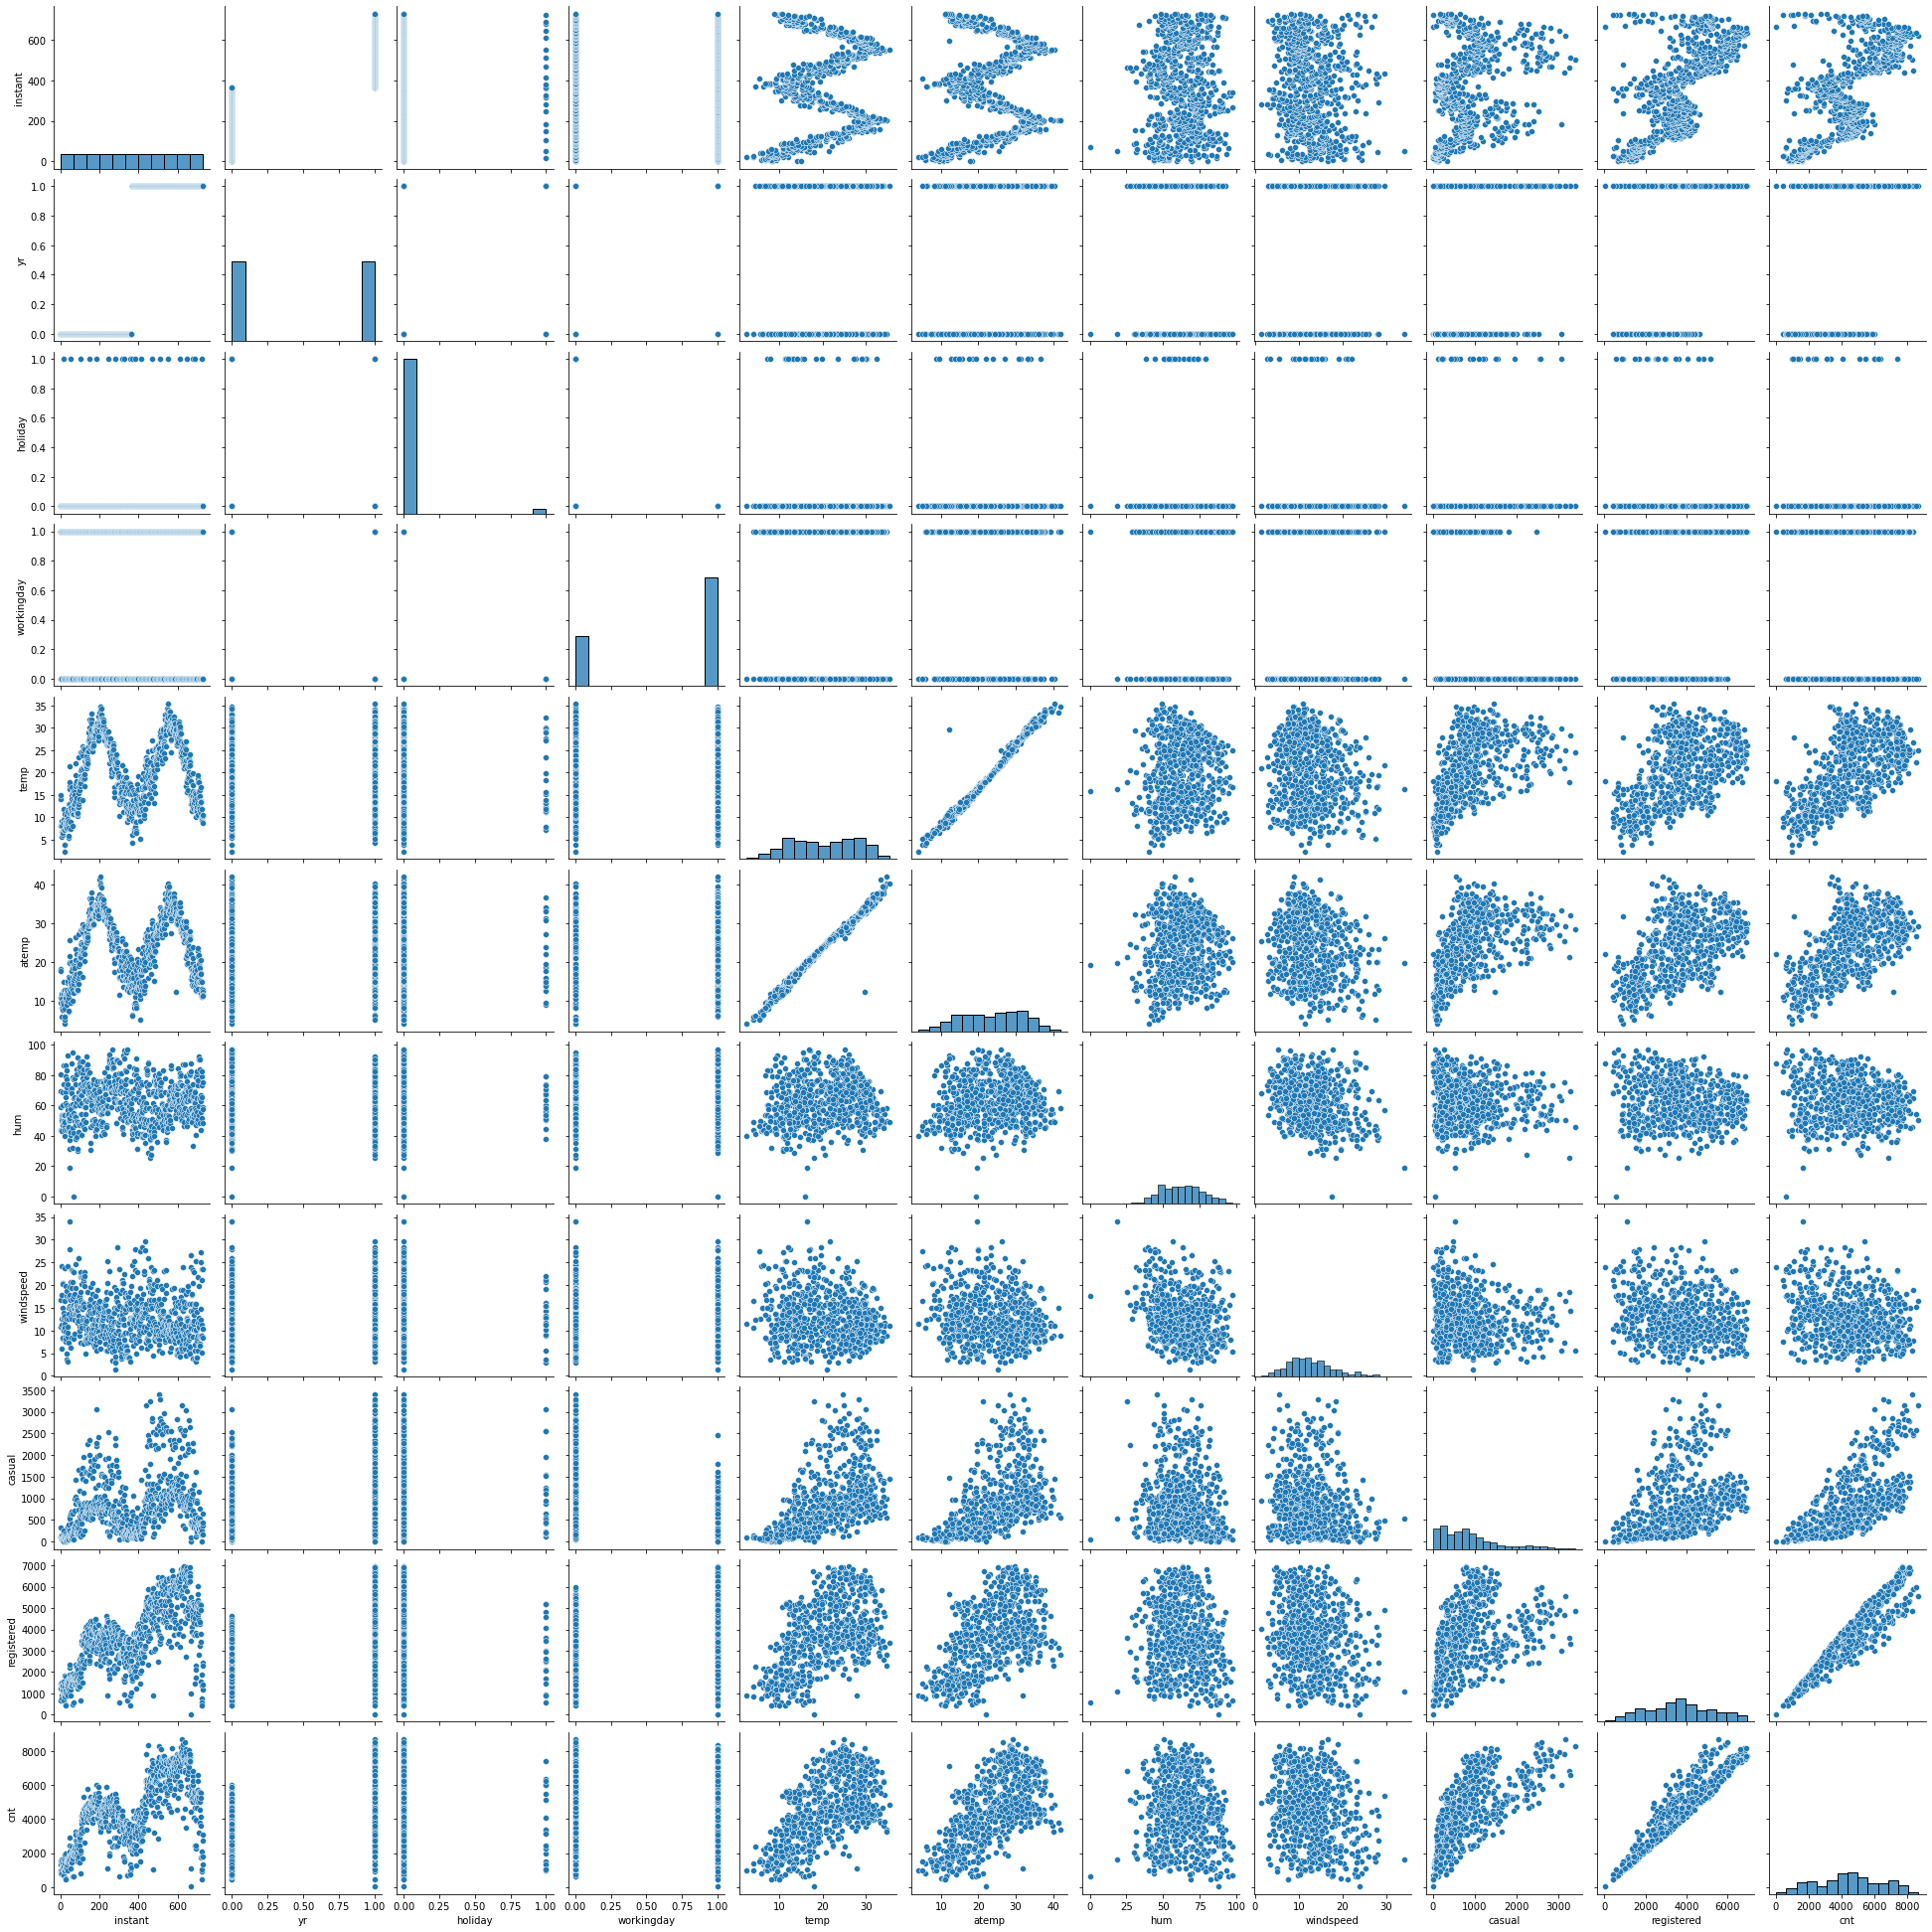

In [12]:
#### Visualizing Numeric Variables after EDA
plt.figure(figsize = (20, 10))
sns.pairplot(bikeSharing)
plt.show()

#### Visualizing Categorical Variables after EDA

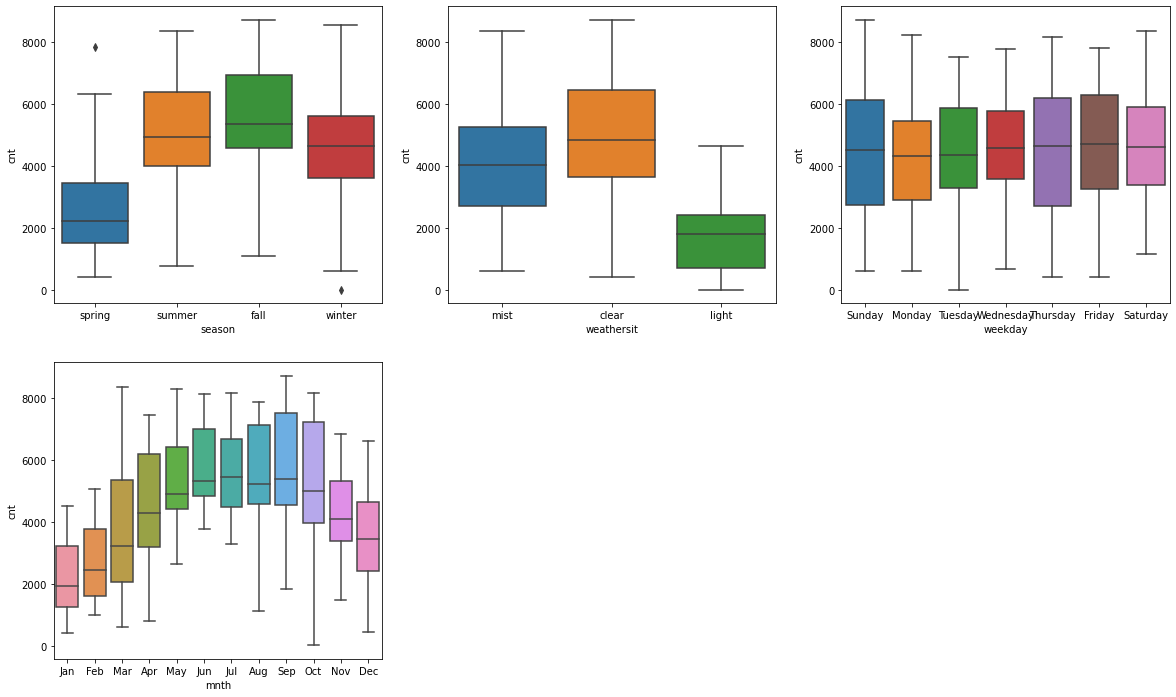

In [13]:
# variable "cnt" is our Target Variable as per problem statement hence ploting cnt as y 

plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
sns.boxplot(x = 'season', y = 'cnt', data = bikeSharing)
plt.subplot(2,3,2)
sns.boxplot(x = 'weathersit', y = 'cnt', data = bikeSharing)
plt.subplot(2,3,3)
sns.boxplot(x = 'weekday', y = 'cnt', data = bikeSharing)
plt.subplot(2,3,4)
sns.boxplot(x = 'mnth', y = 'cnt', data = bikeSharing)
plt.show()

### Step 2.2 Preparing Data
In order to fit a regression line, we would need numerical values and not strings. Right now there is no Yes/No type catagorical variable. But we have catagorical variables like weathersit for which we need to create the dummy variables to make into proper numeric format.

#### A] Creating Dummy Variables 

In [14]:
## 1. weathersit Dummy Variables  
# Get the dummy variables for the feature 'weathersit' and store it in a new variable - 'weatherStatus'

weatherStatus = pd.get_dummies(bikeSharing['weathersit'], drop_first = True)
print(weatherStatus.head(5))


## 2. season Dummy Variables  
# Get the dummy variables for the feature 'season' and store it in a new variable - 'seasonStatus'

seasonStatus = pd.get_dummies(bikeSharing['season'], drop_first = True)
print(seasonStatus.head(5))


## 3. weekday Dummy Variables  
# Get the dummy variables for the feature 'weekday' and store it in a new variable - 'weekdayStatus'

weekdayStatus = pd.get_dummies(bikeSharing['weekday'], drop_first = True)
print(weekdayStatus.head(5))


## 4. mnth Dummy Variables  
# Get the dummy variables for the feature 'mnth' and store it in a new variable - 'mnthStatus'

mnthStatus = pd.get_dummies(bikeSharing['mnth'],  drop_first = True)
print(mnthStatus.head(5))

   light  mist
0      0     1
1      0     1
2      0     0
3      0     0
4      0     0
   spring  summer  winter
0       1       0       0
1       1       0       0
2       1       0       0
3       1       0       0
4       1       0       0
   Monday  Saturday  Sunday  Thursday  Tuesday  Wednesday
0       0         0       1         0        0          0
1       1         0       0         0        0          0
2       0         0       0         0        1          0
3       0         0       0         0        0          1
4       0         0       0         1        0          0
   Aug  Dec  Feb  Jan  Jul  Jun  Mar  May  Nov  Oct  Sep
0    0    0    0    1    0    0    0    0    0    0    0
1    0    0    0    1    0    0    0    0    0    0    0
2    0    0    0    1    0    0    0    0    0    0    0
3    0    0    0    1    0    0    0    0    0    0    0
4    0    0    0    1    0    0    0    0    0    0    0


__Concating all created dummy variables to dataset__

**Dropping Coulmns which are not required :-**
1. instant - its an index so not required
2. dteday - dropping this as we already have weekday, mnth and yr (weekday, month and year) variables extracted into dataset
3. weathersit - as we have created dummy variables for it
4. season - as we have created dummy variables for it
5. mnth - as we have created dummy variables for it
6. weekday- as we have created dummy variables for it
7. casual 
8. Registered 

In [15]:
# Concatinating Dummy variables(weatherStatus, seasonStatus, weekdayStatus, mnthStatus) to main dataframe 
bikeSharing = pd.concat([bikeSharing, weatherStatus, seasonStatus, weekdayStatus, mnthStatus], axis=1)

# Dropping Columns
bikeSharing = bikeSharing.drop(['weathersit','season','mnth','weekday',"dteday","instant", "registered", "casual"], axis=1)

# A closer look at Dataframe after adding dummy variables
pd.set_option('display.max_columns', 70)
display(bikeSharing.head(5))

yr  holiday  workingday       temp     atemp      hum  windspeed   cnt  \
0   0        0           0  14.110847  18.18125  80.5833  10.749882   985   
1   0        0           0  14.902598  17.68695  69.6087  16.652113   801   
2   0        0           1   8.050924   9.47025  43.7273  16.636703  1349   
3   0        0           1   8.200000  10.60610  59.0435  10.739832  1562   
4   0        0           1   9.305237  11.46350  43.6957  12.522300  1600   

   light  mist  spring  summer  winter  Monday  Saturday  Sunday  Thursday  \
0      0     1       1       0       0       0         0       1         0   
1      0     1       1       0       0       1         0       0         0   
2      0     0       1       0       0       0         0       0         0   
3      0     0       1       0       0       0         0       0         0   
4      0     0       1       0       0       0         0       0         1   

   Tuesday  Wednesday  Aug  Dec  Feb  Jan  Jul  Jun  Mar  May  Nov  Oct  Sep  
0        0          0    0    0    0    1    0    0    0    0    0    0    0  
1        0          0    0    0    0    1    0    0    0    0    0    0    0  
2        1          0    0    0    0    1    0    0    0    0    0    0    0  
3        0          1    0    0    0    1    0    0    0    0    0    0    0  
4        0          0    0    0    0    1    0    0    0    0    0    0    0

#### B] Splitting the Data into Training and Testing Sets (first step towards linear regression)

In [16]:
# importing libraries required for train test split
from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
df_train, df_test = train_test_split(bikeSharing, train_size = 0.7, test_size = 0.3, random_state = 100) #70-30 ratio used for splitting

print(df_train.shape, df_test.shape)

(510, 30) (219, 30)


#### C] Rescaling the Features 
There are two common ways of rescaling:
1. Min-Max scaling 
2. Standardisation (mean-0, sigma-1) 

here i have used **Min-Max scaling**

In [17]:
# importing library required for MinMaxScaling
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler() # defining scaler object

# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables or the columns which requires scaling
num_vars = ['temp', 'atemp', 'hum', 'windspeed','cnt']

# Rescale the variables from train dataset
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])
df_train.head()

yr  holiday  workingday      temp     atemp       hum  windspeed  \
653   1        0           1  0.509887  0.501133  0.575354   0.300794   
576   1        0           1  0.815169  0.766351  0.725633   0.264686   
426   1        0           0  0.442393  0.438975  0.640189   0.255342   
728   1        0           0  0.245101  0.200348  0.498067   0.663106   
482   1        0           0  0.395666  0.391735  0.504508   0.188475   

          cnt  light  mist  spring  summer  winter  Monday  Saturday  Sunday  \
653  0.864243      0     0       0       0       1       0         0       0   
576  0.827658      0     0       0       0       0       0         0       0   
426  0.465255      0     1       1       0       0       0         0       1   
728  0.204096      0     0       1       0       0       1         0       0   
482  0.482973      0     1       0       1       0       0         0       1   

     Thursday  Tuesday  Wednesday  Aug  Dec  Feb  Jan  Jul  Jun  Mar  May  \
653         0        0          1    0    0    0    0    0    0    0    0   
576         0        0          1    0    0    0    0    1    0    0    0   
426         0        0          0    0    0    0    0    0    0    1    0   
728         0        0          0    0    1    0    0    0    0    0    0   
482         0        0          0    0    0    0    0    0    0    0    0   

     Nov  Oct  Sep  
653    0    1    0  
576    0    0    0  
426    0    0    0  
728    0    0    0  
482    0    0    0

In [18]:
df_train.describe()

yr     holiday  workingday        temp       atemp         hum  \
count  510.000000  510.000000  510.000000  510.000000  510.000000  510.000000   
mean     0.507843    0.025490    0.676471    0.537262    0.512989    0.650369   
std      0.500429    0.157763    0.468282    0.225844    0.212385    0.145882   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000    0.000000    0.000000    0.339853    0.332086    0.538643   
50%      1.000000    0.000000    1.000000    0.540519    0.526811    0.653714   
75%      1.000000    0.000000    1.000000    0.735215    0.688457    0.754830   
max      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   

        windspeed         cnt       light        mist      spring      summer  \
count  510.000000  510.000000  510.000000  510.000000  510.000000  510.000000   
mean     0.320768    0.513620    0.029412    0.343137    0.243137    0.245098   
std      0.169797    0.224593    0.169124    0.475223    0.429398    0.430568   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.199179    0.356420    0.000000    0.000000    0.000000    0.000000   
50%      0.296763    0.518638    0.000000    0.000000    0.000000    0.000000   
75%      0.414447    0.684710    0.000000    1.000000    0.000000    0.000000   
max      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   

          winter      Monday    Saturday      Sunday    Thursday     Tuesday  \
count  510.00000  510.000000  510.000000  510.000000  510.000000  510.000000   
mean     0.24902    0.143137    0.127451    0.154902    0.158824    0.150980   
std      0.43287    0.350557    0.333805    0.362166    0.365870    0.358381   
min      0.00000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.00000    0.000000    0.000000    0.000000    0.000000    0.000000   
50%      0.00000    0.000000    0.000000    0.000000    0.000000    0.000000   
75%      0.00000    0.000000    0.000000    0.000000    0.000000    0.000000   
max      1.00000    1.000000    1.000000    1.000000    1.000000    1.000000   

        Wednesday         Aug         Dec         Feb         Jan         Jul  \
count  510.000000  510.000000  510.000000  510.000000  510.000000  510.000000   
mean     0.131373    0.096078    0.084314    0.066667    0.088235    0.076471   
std      0.338139    0.294988    0.278131    0.249689    0.283915    0.266010   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
50%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
75%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
max      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   

              Jun         Mar         May         Nov         Oct         Sep  
count  510.000000  510.000000  510.000000  510.000000  510.000000  510.000000  
mean     0.074510    0.098039    0.084314    0.086275    0.086275    0.080392  
std      0.262857    0.297660    0.278131    0.281045    0.281045    0.272166  
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000  
25%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000  
50%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000  
75%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000  
max      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000

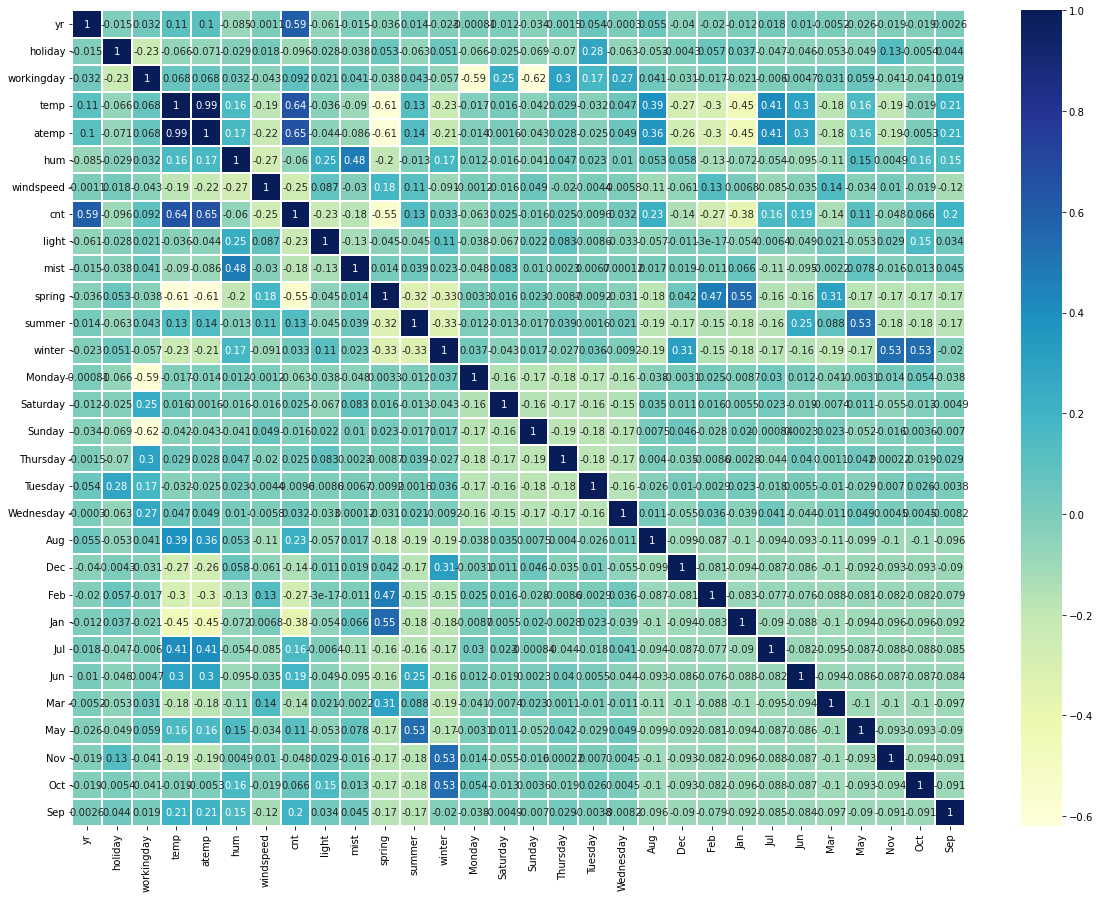

In [19]:
# Let's check the correlation coefficients to see which variables are highly correlated
plt.figure(figsize = (20, 15))
sns.heatmap(df_train.corr(), annot = True, cmap="YlGnBu", linewidths=.3)
plt.show()

As you might have noticed, `atemp` seems to the correlated to `cnt` the most.

##### Dividing into X and Y sets for the model building

In [20]:
y_train = df_train.pop('cnt') #cnt is our target variable
X_train = df_train

## Step 3: Building Model  (Using RFE)
There are two Techniques To build the model or selecting the feature to build the model
1. Forward Selection :- We build model starting with one variable and keep adding one by one
2. Backward Elimination :- Initaially we will add all the variables then drop the variable which is not significant one by one

Also there is automated way for selecting the feature in model building that is **RFE (Recursive Feature Elimination)**

we will be using the **LinearRegression function from SciKit Learn** for its compatibility with RFE (which is a utility from sklearn) for initial feature selection then will continue with backword elimination method for droping variables one by one.

#### 3.1 Using RFE for selecting variables at first 
Selecting 15 variables on the first go

In [21]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [22]:
# Running RFE with the output number of the variable equal to 15
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 15)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [23]:
# lets look at which columns are selected and which are not along with there ranking by RFE
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', False, 5),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('light', True, 1),
 ('mist', True, 1),
 ('spring', True, 1),
 ('summer', True, 1),
 ('winter', True, 1),
 ('Monday', False, 8),
 ('Saturday', False, 11),
 ('Sunday', True, 1),
 ('Thursday', False, 13),
 ('Tuesday', False, 9),
 ('Wednesday', False, 10),
 ('Aug', False, 7),
 ('Dec', False, 3),
 ('Feb', False, 4),
 ('Jan', True, 1),
 ('Jul', True, 1),
 ('Jun', False, 14),
 ('Mar', False, 15),
 ('May', False, 6),
 ('Nov', False, 2),
 ('Oct', False, 12),
 ('Sep', True, 1)]

In [24]:
# rfe.support_ shoes the vaiable names that are picked by RFE for model building 
col = X_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'light',
       'mist', 'spring', 'summer', 'winter', 'Sunday', 'Jan', 'Jul', 'Sep'],
      dtype='object')

In [25]:
# The vaiable names that are not picked by RFE for model building
X_train.columns[~rfe.support_]

Index(['atemp', 'Monday', 'Saturday', 'Thursday', 'Tuesday', 'Wednesday',
       'Aug', 'Dec', 'Feb', 'Jun', 'Mar', 'May', 'Nov', 'Oct'],
      dtype='object')

#### Building model using statsmodel, for the detailed statistics

In [26]:
# Creating X_train dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [27]:
# importing statsmodels for model creation and VIF Calculation
import statsmodels.api as sm 
from statsmodels.stats.outliers_influence import variance_inflation_factor

#### Linear Model 1 :-

In [28]:
# Adding a constant variable
X_train_rfe = sm.add_constant(X_train_rfe)

lm = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model

# Let's see the summary of our linear model 1 :-
print(lm.summary())

# Calculate the VIFs for Linear Model 1 :-
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     184.6
Date:                Sun, 13 Mar 2022   Prob (F-statistic):          2.31e-191
Time:                        18:14:27   Log-Likelihood:                 519.88
No. Observations:                 510   AIC:                            -1008.
Df Residuals:                     494   BIC:                            -940.0
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2510      0.036      6.949      0.0

Features    VIF
0        const  84.59
9       spring   5.08
4         temp   3.89
11      winter   3.60
10      summer   2.64
5          hum   1.92
3   workingday   1.88
12      Sunday   1.78
8         mist   1.57
13         Jan   1.57
14         Jul   1.49
15         Sep   1.30
7        light   1.25
6    windspeed   1.21
2      holiday   1.16
1           yr   1.04

**Observations from Linear Model 1 Summary :-** 
`spring` is insignificant as it is highly corelated with other variables hence we can drop the column

In [29]:
# Dropping Spring column and creatig new X_train for next model building
X_train_rfe = X_train_rfe.drop(["spring"], axis = 1)

#### 3.2 Backword Elimination - from here we will drop variables one by one looking at models summary
#### Linear Model 2 :-
Building the model after dropping **spring** variable

In [30]:
# Adding a constant variable 
X_train_lm = sm.add_constant(X_train_rfe)

lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model

print(lm.summary())

# Calculate the VIFs for Linear Model 2 :-

vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     195.3
Date:                Sun, 13 Mar 2022   Prob (F-statistic):          3.24e-191
Time:                        18:14:27   Log-Likelihood:                 516.77
No. Observations:                 510   AIC:                            -1004.
Df Residuals:                     495   BIC:                            -940.0
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2003      0.030      6.717      0.0

Features    VIF
0        const  57.07
4         temp   2.07
5          hum   1.90
3   workingday   1.88
11      Sunday   1.78
8         mist   1.56
12         Jan   1.55
10      winter   1.53
13         Jul   1.43
9       summer   1.41
7        light   1.25
6    windspeed   1.19
14         Sep   1.19
2      holiday   1.16
1           yr   1.03

**Observations from Linear Model 2 Summary :-** 
At this point we have all the variables with low p-value and low VIF so we can stop droping columns here and finalize the model

## Step 4: Residual Analysis of the train data

So, now to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.

In [31]:
# LinearRegression libraries predict method can be used to get ypred for trinaing dataset
y_train_cnt = lm.predict(X_train_rfe) # here y_train_cnt is our predicted value of y 

In [32]:
# Importing the required libraries for plots.
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Text(0.5, 0, 'Errors')

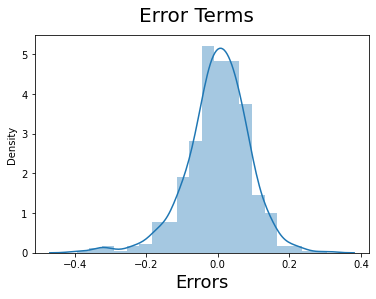

In [33]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_cnt), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

**Observations :-** The model satisfies the assumption that models error terms should be normally distributed to mean zero.

## Step 5: Making Predictions using last model created i.e Linear model 9
#### Applying the scaling on the test sets

In [34]:
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables or the columns which requires scaling
num_vars = ['temp', 'atemp', 'hum', 'windspeed', 'cnt']

# Rescale the variables from test dataset
df_test[num_vars] = scaler.transform(df_test[num_vars])
df_test.head()

yr  holiday  workingday      temp     atemp       hum  windspeed  \
184   0        1           0  0.831783  0.769660  0.657364   0.084219   
535   1        0           1  0.901354  0.842587  0.610133   0.153728   
299   0        0           1  0.511964  0.496145  0.837699   0.334206   
221   0        0           1  0.881625  0.795343  0.437098   0.339570   
152   0        0           1  0.817246  0.741471  0.314298   0.537414   

          cnt  light  mist  spring  summer  winter  Monday  Saturday  Sunday  \
184  0.692706      0     1       0       0       0       0         0       0   
535  0.712034      0     0       0       1       0       0         0       0   
299  0.303382      0     1       0       0       1       0         0       0   
221  0.547400      0     0       0       0       0       0         0       0   
152  0.569029      0     0       0       1       0       0         0       0   

     Thursday  Tuesday  Wednesday  Aug  Dec  Feb  Jan  Jul  Jun  Mar  May  \
184         0        1          0    0    0    0    0    1    0    0    0   
535         1        0          0    0    0    0    0    0    1    0    0   
299         0        0          0    0    0    0    0    0    0    0    0   
221         1        0          0    1    0    0    0    0    0    0    0   
152         0        0          0    0    0    0    0    0    1    0    0   

     Nov  Oct  Sep  
184    0    0    0  
535    0    0    0  
299    0    1    0  
221    0    0    0  
152    0    0    0

#### Dividing into X_test and y_test

In [35]:
y_test = df_test.pop('cnt')
X_test = df_test

# Now let's use our model to make predictions.

# Creating X_test_new dataframe by dropping variables from X_test
X_train_rfe = X_train_rfe.drop(['const'], axis=1)
X_test_new = X_test[X_train_rfe.columns]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)


# Making predictions
y_pred = lm.predict(X_test_new)

**At this point we have predicted values of y for test dataset**

## Step 6:  Model Evaluation

#### Calculating  R squared for test data set

In [36]:
from sklearn.metrics import r2_score

r2 = r2_score(y_test, y_pred)
print(r2)

0.8045864770086915


**Observation :-** The R squared value for train set is __0.847__ and test is __0.804__ which almost same hence we can say our model is best fit model.

Text(0, 0.5, 'y_pred')

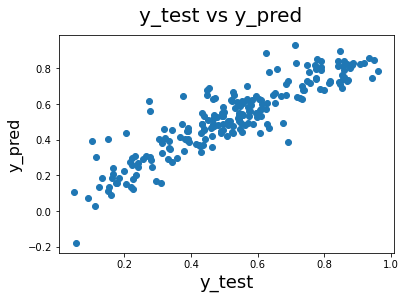

In [37]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label

##### We can see that the equation of our best fitted line is:


$ cnt = 0.2294 \times yr - 0.0600 \times holiday + 0.0439 \times workingday + 0.5677 \times temp - 0.1643 \times hum - 0.1932 \times windspeed - 0.2446 \times light - 0.0556 \times mist + 0.0746 \times summer + 0.1266 \times winter + 0.0540  \times Sunday - 0.0392  \times Jan - 0.0445  \times Jul + 0.0926 \times Sep $

### Conclusions :-
**1. The variables that are significant in predicting the demand for shared bikes are :-**
1.	temp - top 1 feature highly significant for bike share demand
2.	hum
3.	workingday
4.	Sunday
5.	mist
6.	Jan
7.	winter
8.	Jul
9.	summer
10.	light - top 2 feature highly significant for bike share demand
11.	windspeed - top 3 feature highly significant for bike share demand
12.	Sep
13.	holiday
14.	yr

**2. How well those variables describe the bike demands :-**
1. Demand of bike share and the temp has positive correlation. demand increases as the temp increases
2. when the windspeed is less then demand of bike share increases
3. same with humidity, As the humidity downs the demand for bike share goes up
4. demand of bike share is low during January and july month and high during september month.
5. demand of bike share is high during summer and winter season
6. on holiday bike share is low as compare to workingday.
7. when weather is light that is Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds As the demand for bike share goes down. And same when weather is mist (Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds)